In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
PATH = './tmp/'

In [36]:
import json
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [78]:
original_l1 = 'weights_test'
original_l2 = 'weights_test_l2'
transformed_l1 = 'weights_test_bin_l1'
transformed_l2 = 'weights_test_bin_l2'

norm = 'l1'
name = PATH + transformed_l1 + '/'

In [79]:
with open(name + 'info', 'r') as file:
    model_info = json.load(file)

In [80]:
ckpt_no = model_info['ckpt_no'] - 1
train_loss_ = name + 'loss_curve_{}'.format(ckpt_no)
test_loss_  = name + 'test_loss_curve_{}'.format(ckpt_no)
weights_curve_ = name + 'weights_curve_{}_{}'.format(norm,ckpt_no)

In [81]:
train_loss = pd.read_csv(train_loss_, index_col=0)

In [82]:
test_loss = pd.read_csv(test_loss_, index_col=0)

In [83]:
weights_curve = pd.read_csv(weights_curve_, index_col=0)

In [84]:
generalization_error = (train_loss - test_loss.rename(columns={'loss_test':'loss'})).abs()
generalization_error = generalization_error.rename(columns={'loss':'generalization_err'})

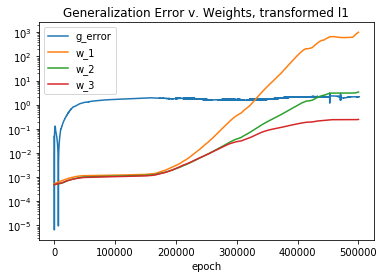

In [89]:
plt.plot(generalization_error)
plt.plot(np.exp(weights_curve/8)/2700)
plt.legend(['g_error','w_1','w_2','w_3'])
plt.yscale('log')
plt.title('Generalization Error v. Weights, transformed l1')
plt.xlabel('epoch')
plt.savefig('generalization_transformed_l1.png', dpi=300)
plt.show()

In [39]:
os.listdir(name)

['weights_curve_l1_400000',
 'model.ckpt.index',
 'model.ckpt.data-00000-of-00001',
 'checkpoint',
 'test_loss_curve_400000',
 'loss_curve_400000',
 'biases_curve_400000',
 'info',
 'model.ckpt.meta']